In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import yaml
from src import cct  # Importing the cct module

# Assuming your results_final directory is at a certain path
results_final_path = "result_final"


def construct_model_dict(results_final_path):
    model_dict = {}

    for model_folder in os.listdir(results_final_path):
        model_path = os.path.join(results_final_path, model_folder)
        args_file = os.path.join(model_path, "args.yaml")

        if os.path.isdir(model_path) and os.path.exists(args_file):
            with open(args_file, "r") as file:
                args = yaml.safe_load(file)
                model_name = args.get("model", None)
                if model_name:
                    # Map the model_name to the initialization function
                    model_init_function = getattr(cct, model_name, None)
                    if model_init_function:
                        # Initialize the model
                        model = model_init_function(
                            pretrained=False,
                            progress=False,
                            img_size=args.get("img_size", 32),
                            positional_embedding="learnable",
                            num_classes=args.get("num_classes", 10),
                        )
                        model_dict[model_folder] = model
                        print(
                            f"Model mapped successfully: {model_folder} -> {model_name}"
                        )
                    else:
                        print(
                            f"Could not map model for folder '{model_folder}': No initialization function for '{model_name}'"
                        )
                else:
                    print(
                        f"Model name not found in args.yaml for folder '{model_folder}'"
                    )

    return model_dict


def get_model_parameter_counts(modelDict):
    param_counts = {}
    for model_name, model in modelDict.items():
        param_count = sum(p.numel() for p in model.parameters())
        param_counts[model_name] = param_count
    return param_counts


def get_best_eval_top1_scores(results_dir):
    cifar10_scores = {}
    cifar100_scores = {}

    for index, model_folder in enumerate(sorted(os.listdir(results_dir))):
        model_path = os.path.join(results_dir, model_folder)
        if os.path.isdir(model_path):
            # Read args.yaml to determine the dataset
            args_file = os.path.join(model_path, "args.yaml")
            if os.path.exists(args_file):
                with open(args_file, "r") as file:
                    args = yaml.safe_load(file)
                    dataset = args.get("dataset", "")

            # Read and process summary.csv
            summary_file = os.path.join(model_path, "summary.csv")
            if os.path.exists(summary_file):
                summary_df = pd.read_csv(summary_file)
                best_score = summary_df["eval_top1"].max()

                # Print the folder and score information
                print(
                    f"Folder {index+1}: {model_folder}, Best Eval Top1 Score: {best_score}"
                )
                # Add to respective dictionary
                if dataset == "cifar10":
                    cifar10_scores[model_folder] = best_score
                elif dataset == "cifar100":
                    cifar100_scores[model_folder] = best_score

    # Sort the scores in descending order
    cifar10_scores = {
        k: v
        for k, v in sorted(
            cifar10_scores.items(), key=lambda item: item[1], reverse=True
        )
    }
    cifar100_scores = {
        k: v
        for k, v in sorted(
            cifar100_scores.items(), key=lambda item: item[1], reverse=True
        )
    }

    return cifar10_scores, cifar100_scores


def plot_scores(scores, title, param_counts):
    plt.figure(figsize=(10, 6))
    models = list(scores.keys())
    models = [model.replace("Bryan_full_", "").replace("full", "") for model in models]
    eval_top1_scores = list(scores.values())

    # Normalize parameter counts for color intensity
    max_param_count = max(param_counts.values())
    colors = [
        plt.cm.Blues(param_counts[model] / max_param_count) for model in scores.keys()
    ]

    bars = plt.bar(models, eval_top1_scores, color=colors)
    plt.xlabel("Model")
    plt.ylabel("Best Eval Top1 Score")
    plt.title(title)
    plt.xticks(rotation=90)

    # Annotate each bar with its score
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            yval,
            round(yval, 2),
            verticalalignment="bottom",
            horizontalalignment="center",
            color="black",
            fontsize=8,
        )

    plt.show()


modelDict = construct_model_dict(results_final_path)


/home/incomple_/anaconda3/envs/cv-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/incomple_/anaconda3/envs/cv-env/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Model mapped successfully: Bryan_full_cct_7_3x1_32_c100_DynEmbed -> cct_DynEmbed_7_3x1_32
Model mapped successfully: Bryan_full_cct_7_3x1_32_c100_SETok_fixed -> cct_SETok_7_3x1_32_c100
Model mapped successfully: Bryan_full_cct_7_3x1_32_c100_DynEmbed_TempScaleAttnFactor -> cct_DynEmbedTempScaleAttnFactor_7_3x1_32
Model mapped successfully: Bryan_full_cct_2_3x2_32_DynEmbed_TempScaleAttn -> cct_DynEmbedTempScaleAttn_2_3x2_32
Model mapped successfully: Bryan_full_cct_7_3x1_32_DynEmbed -> cct_DynEmbed_7_3x1_32
Model mapped successfully: full_cct_7_3x1_32 -> cct_7_3x1_32
Model mapped successfully: Bryan_full_cct_2_3x2_32_c100_DynEmbed -> cct_DynEmbed_2_3x2_32_c100
Model mapped successfully: Bryan_full_cct_6_3x1_32_DynEmbed -> cct_DynEmbed_6_3x1_32
Model mapped successfully: Bryan_full_cct_7_3x1_32_DynEmbed_TempScaleAttnFactor -> cct_DynEmbedTempScaleAttnFactor_7_3x1_32
Model mapped successfully: Bryan_full_cct_6_3x1_32 -> cct_6_3x1_32
Model mapped successfully: Bryan_full_cct_7_3x1_32_c100_D

In [2]:
cifar10_scores, cifar100_scores = get_best_eval_top1_scores(results_final_path)
param_counts = get_model_parameter_counts(modelDict)

Folder 1: Bryan_full_cct_2_3x2_32_DynEmbed, Best Eval Top1 Score: 87.95
Folder 2: Bryan_full_cct_2_3x2_32_DynEmbed_TempScaleAttn, Best Eval Top1 Score: 88.18
Folder 3: Bryan_full_cct_2_3x2_32_SETok_fixed, Best Eval Top1 Score: 86.95
Folder 4: Bryan_full_cct_2_3x2_32_c100, Best Eval Top1 Score: 62.78
Folder 5: Bryan_full_cct_2_3x2_32_c100_DynEmbed, Best Eval Top1 Score: 65.59
Folder 6: Bryan_full_cct_2_3x2_32_c100_DynEmbed_TempScaleAttn, Best Eval Top1 Score: 65.67
Folder 8: Bryan_full_cct_2_3x2_32_c100_SETok_fixed, Best Eval Top1 Score: 62.15
Folder 9: Bryan_full_cct_6_3x1_32, Best Eval Top1 Score: 95.38
Folder 10: Bryan_full_cct_6_3x1_32_DynEmbed, Best Eval Top1 Score: 95.47
Folder 11: Bryan_full_cct_6_3x1_32_DynEmbed_TempScaleAttnFactor, Best Eval Top1 Score: 93.76
Folder 12: Bryan_full_cct_6_3x1_32_SETok_fixed, Best Eval Top1 Score: 95.08
Folder 13: Bryan_full_cct_6_3x1_32_c100, Best Eval Top1 Score: 80.27
Folder 14: Bryan_full_cct_6_3x1_32_c100_DynEmbed, Best Eval Top1 Score: 80.5


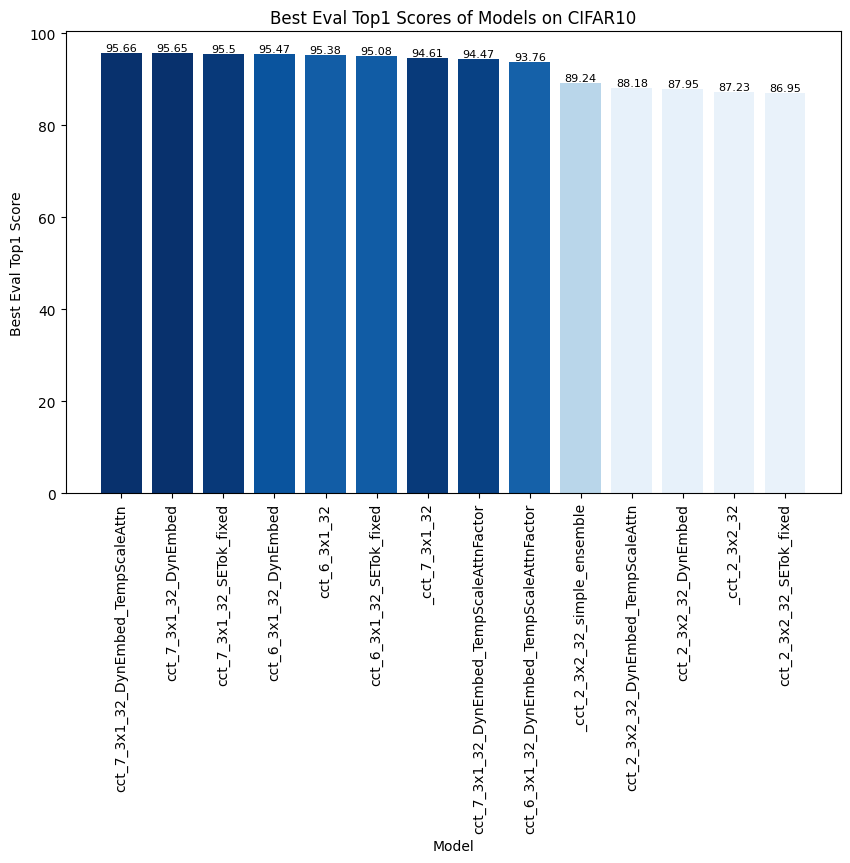

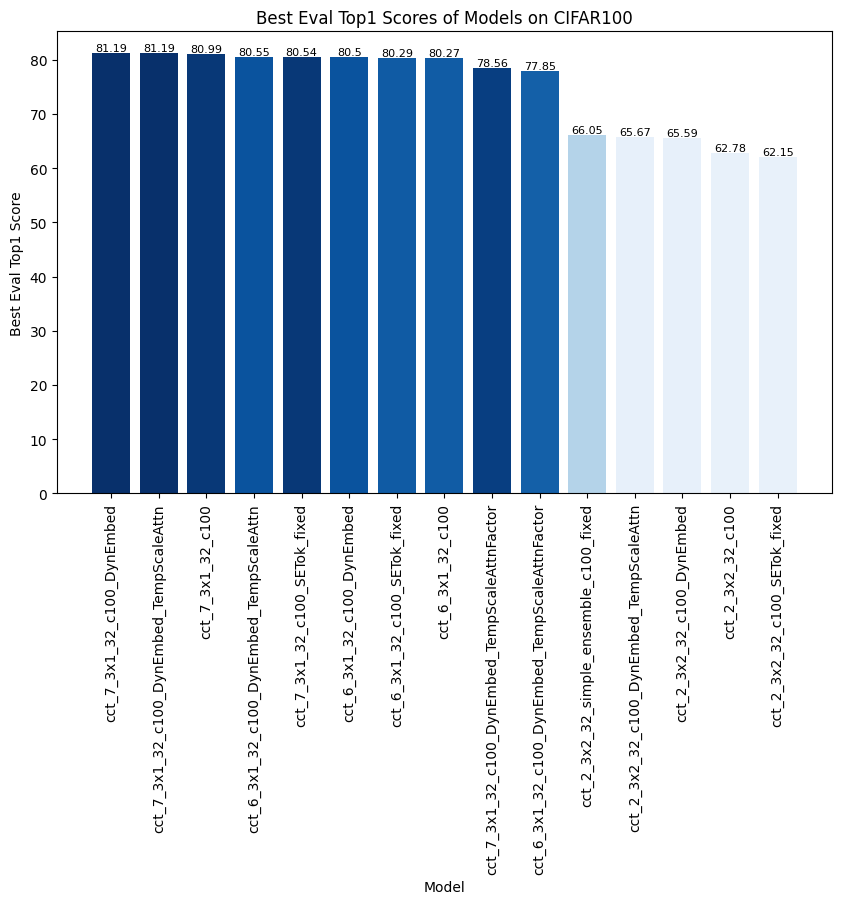

In [3]:
# Plot for CIFAR10
plot_scores(cifar10_scores, "Best Eval Top1 Scores of Models on CIFAR10", param_counts)

# Plot for CIFAR100
plot_scores(
    cifar100_scores, "Best Eval Top1 Scores of Models on CIFAR100", param_counts
)

In [4]:
import torch
import os
import yaml  # Import yaml for handling YAML files
from train import validate  # Importing the validate function from train.py
from timm.data import create_dataset, create_loader
from timm.utils import *


class Args(object):
    def __init__(self, dictionary):
        for key, value in dictionary.items():
            setattr(self, key, value)
        # Set default values for potentially missing keys
        self.set_default("prefetcher", True)
        # Add other default values as needed

    def set_default(self, key, value):
        if not hasattr(self, key):
            setattr(self, key, value)


def chooseModel(modelDict):
    availableActions = {str(i + 1): k for (i, k) in enumerate(modelDict.keys())}
    nl = "\n"
    availableActionsList = [(key, val) for key, val in availableActions.items()]
    print(f"Use number keys to choose one of the models below: \n")
    print(
        f"Available Models: {nl.join(f'[{tup[0]}: {tup[1]}]' for tup in availableActionsList)}"
    )

    while True:
        userInput = input("Enter your action: ")
        if userInput not in availableActions:
            print(f"{userInput} is an invalid action. Please try again.")
        else:
            return availableActions[userInput]


def evalSingle(modelDict, results_final_path):
    print("Starting model selection...")
    model_name = chooseModel(modelDict)
    print(f"'{model_name}' selected for evaluation and visualization")

    args_file = os.path.join(results_final_path, model_name, "args.yaml")
    print(f"Reading configuration from {args_file}")

    with open(args_file, "r") as file:
        args = Args(yaml.safe_load(file))
    print("Initializing model...")
    model = modelDict.get(model_name, None)
    if model is None:
        print(f"Model '{model_name}' not found in modelDict")
        return

    device = "cuda" if torch.cuda.is_available() else "cpu"
    checkpoint_path = os.path.join(results_final_path, model_name, "model_best.pth.tar")
    print(f"Loading checkpoint from {checkpoint_path}")

    try:
        # Load model and move to device
        checkpoint = torch.load(checkpoint_path, map_location=device)
        if "state_dict" in checkpoint:
            model.load_state_dict(checkpoint["state_dict"])
        else:
            model.load_state_dict(checkpoint)
        model.to(device)
        model.eval()
        print("Model loaded successfully.")

        print(f"Initializing DataLoader for dataset: {args.dataset}...")
        dataset_eval = create_dataset(
            args.dataset,
            root=args.data_dir,
            split=args.val_split,
            is_training=False,
            batch_size=args.batch_size,
        )
        loader_eval = create_loader(
            dataset_eval,
            input_size=(3, 32, 32),
            batch_size=args.validation_batch_size_multiplier * args.batch_size,
            is_training=False,
            use_prefetcher=False,
            interpolation=args.interpolation,
            mean=args.mean,
            std=args.std,
            num_workers=args.workers,
            distributed=False,
            crop_pct=args.crop_pct,
            pin_memory=args.pin_mem,
        )
        print("Initializing loss function...")
        loss_fn = torch.nn.CrossEntropyLoss().to(device)
        print("DataLoader and loss function initialized.")

        print("Starting model evaluation...")
        model.eval()
        batch_time_m = AverageMeter()
        losses_m = AverageMeter()
        top1_m = AverageMeter()
        top5_m = AverageMeter()

        with torch.no_grad():
            for batch_idx, (input, target) in enumerate(loader_eval):
                # Move input and target to the same device as the model
                input, target = input.to(device), target.to(device)

                # Forward pass
                output = model(input)
                loss = loss_fn(output, target)
                acc1, acc5 = accuracy(output, target, topk=(1, 5))

                # Update metrics
                losses_m.update(loss.item(), input.size(0))
                top1_m.update(acc1.item(), output.size(0))
                top5_m.update(acc5.item(), output.size(0))

        eval_metrics = {"loss": losses_m.avg, "top1": top1_m.avg, "top5": top5_m.avg}
        print(f"Evaluation Metrics for {model_name}: {eval_metrics}")
        return eval_metrics
    except Exception as e:
        print(f"Error loading {model_name} with checkpoint: {checkpoint_path}")
        print(e)


evalSingle(modelDict, results_final_path)

Starting model selection...
Use number keys to choose one of the models below: 

Available Models: [1: Bryan_full_cct_7_3x1_32_c100_DynEmbed]
[2: Bryan_full_cct_7_3x1_32_c100_SETok_fixed]
[3: Bryan_full_cct_7_3x1_32_c100_DynEmbed_TempScaleAttnFactor]
[4: Bryan_full_cct_2_3x2_32_DynEmbed_TempScaleAttn]
[5: Bryan_full_cct_7_3x1_32_DynEmbed]
[6: full_cct_7_3x1_32]
[7: Bryan_full_cct_2_3x2_32_c100_DynEmbed]
[8: Bryan_full_cct_6_3x1_32_DynEmbed]
[9: Bryan_full_cct_7_3x1_32_DynEmbed_TempScaleAttnFactor]
[10: Bryan_full_cct_6_3x1_32]
[11: Bryan_full_cct_7_3x1_32_c100_DynEmbed_TempScaleAttn]
[12: Bryan_full_cct_2_3x2_32_c100_SETok_fixed]
[13: Bryan_full_cct_2_3x2_32_c100_DynEmbed_TempScaleAttnFactor]
[14: cct_2_3x2_32_simple_ensemble_c100_fixed]
[15: Bryan_full_cct_6_3x1_32_c100_DynEmbed_TempScaleAttnFactor]
[16: Bryan_full_cct_6_3x1_32_DynEmbed_TempScaleAttnFactor]
[17: Bryan_full_cct_2_3x2_32_c100_DynEmbed_TempScaleAttn]
[18: Bryan_full_cct_2_3x2_32_c100]
[19: Bryan_full_cct_7_3x1_32_DynEmbe

{'loss': 0.868474494934082, 'top1': 81.19, 'top5': 95.39}